In [7]:
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [5]:
lens = []
for file in tqdm(os.listdir('../features/train/speech/')):
    lens.append(np.load('../features/train/speech/'+file).shape[-1])

100%|██████████| 44361/44361 [00:53<00:00, 829.87it/s]


854


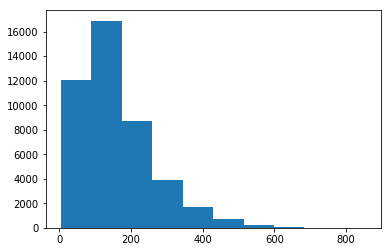

In [10]:
plt.hist(lens)
print(np.max(lens))

100%|██████████| 5386/5386 [00:06<00:00, 789.23it/s]


731


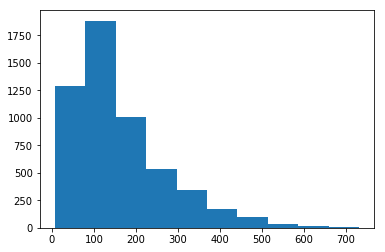

In [11]:
lens = []
for file in tqdm(os.listdir('../features/val/speech/')):
    lens.append(np.load('../features/val/speech/'+file).shape[-1])
    
plt.hist(lens)
print(np.max(lens))

100%|██████████| 3720/3720 [00:04<00:00, 761.53it/s]


895


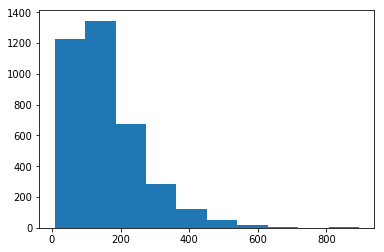

In [12]:
lens = []
for file in tqdm(os.listdir('../features/test/speech/')):
    lens.append(np.load('../features/test/speech/'+file).shape[-1])
    
plt.hist(lens)
print(np.max(lens))